In [1]:
import pandas as pd
path_toFile ="/Users/krapi/Documents/NYC2/NYCFare/train.csv"
data = pd.read_csv(path_toFile,encoding='utf-8',nrows=2000000,parse_dates = ['pickup_datetime'])
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [2]:
data=data.dropna()
data.drop('key',axis=1)
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.999986e+06,1.999986e+06,1.999986e+06,1.999986e+06,1.999986e+06,1.999986e+06
mean,1.134768e+01,-7.252324e+01,3.992965e+01,-7.252395e+01,3.992808e+01,1.684125e+00
std,9.852609e+00,1.286798e+01,7.983330e+00,1.277497e+01,1.032382e+01,1.314979e+00
min,-6.200000e+01,-3.377681e+03,-3.458665e+03,-3.383297e+03,-3.461541e+03,0.000000e+00
25%,6.000000e+00,-7.399208e+01,4.073491e+01,-7.399141e+01,4.073400e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075312e+01,1.000000e+00
75%,1.250000e+01,-7.396713e+01,4.076710e+01,-7.396369e+01,4.076809e+01,2.000000e+00
max,1.273310e+03,2.856442e+03,2.621628e+03,3.414307e+03,3.345917e+03,2.080000e+02


In [3]:
import matplotlib.pyplot as plt
data.fare_amount.hist(bins=100,figsize=(10,8))
plt.xlabel('Fares in USD')

Text(0.5,0,'Fares in USD')

In [4]:
data = data[(data.fare_amount<=100) & (data.fare_amount>=2.5)]

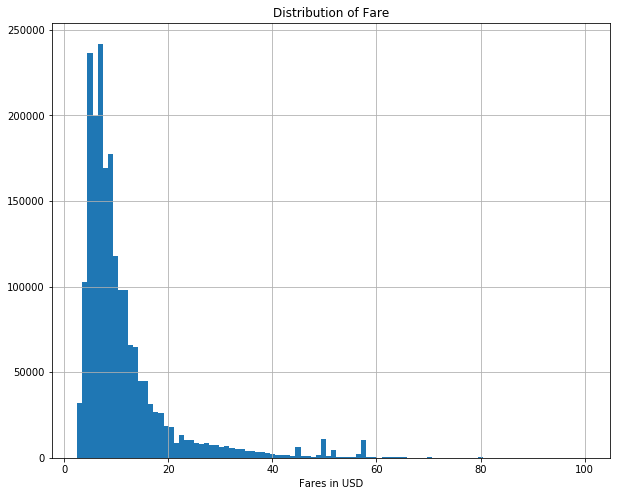

In [5]:
import matplotlib.pyplot as plt
data.fare_amount.hist(bins=100,figsize=(10,8))
plt.xlabel('Fares in USD')
plt.title('Distribution of Fare')
plt.savefig('Fare Distribution1.png',dpi=300, bbox_inches='tight')  
plt.show()

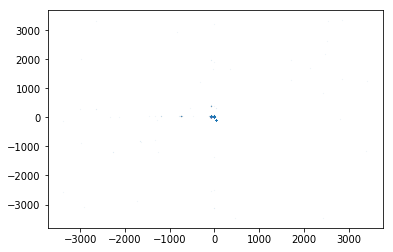

In [6]:
longitude = list(data.pickup_longitude) + list(data.dropoff_longitude)
latitude = list(data.pickup_latitude) + list(data.dropoff_latitude)
plt.plot(longitude,latitude,'.', markersize = 0.05)
plt.show()

In [7]:
latlim=[39.5000,41.2500]
longlim=[-74.5000,-72.500]
data = data[(data.pickup_longitude> longlim[0]) & (data.pickup_longitude < longlim[1])]
data = data[(data.pickup_latitude> latlim[0]) & (data.pickup_latitude < latlim[1])]
data = data[(data.dropoff_longitude> longlim[0]) & (data.dropoff_longitude < longlim[1])]
data = data[(data.dropoff_latitude> latlim[0]) & (data.dropoff_latitude < latlim[1])]

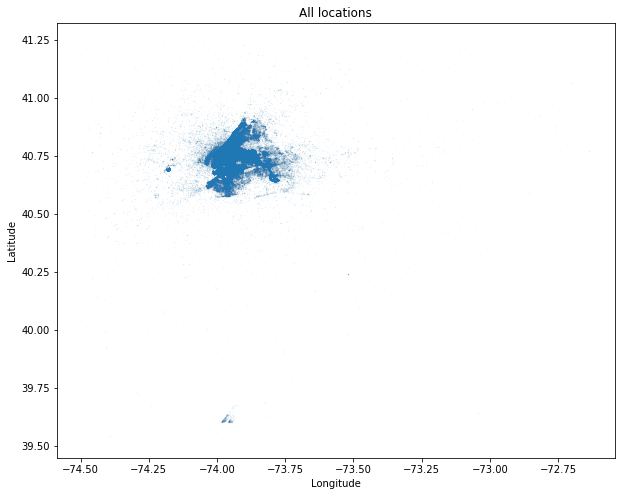

In [8]:
longitude = list(data.pickup_longitude) + list(data.dropoff_longitude)
latitude = list(data.pickup_latitude) + list(data.dropoff_latitude)
plt.figure(figsize=(10,8))
plt.plot(longitude,latitude,'.', markersize = 0.05)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('All locations')
plt.savefig(' All_Locations1.png',dpi=300, bbox_inches='tight')  
plt.show()

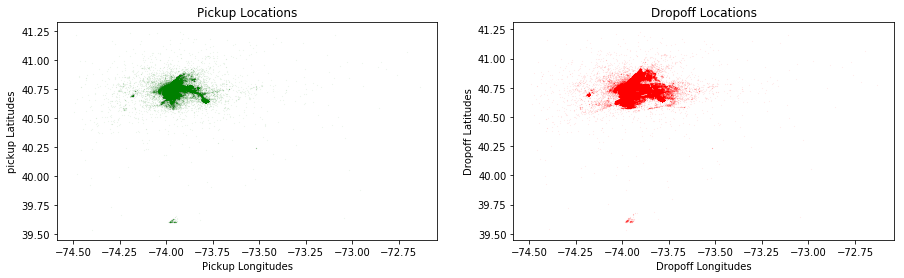

In [9]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(data.pickup_longitude,data.pickup_latitude,'.', markersize = 0.05,color='green')
plt.xlabel('Pickup Longitudes')
plt.ylabel('pickup Latitudes')
plt.title('Pickup Locations')
plt.subplot(1,2,2)
plt.plot(data.dropoff_longitude,data.dropoff_latitude,'.', markersize = 0.05,color='red')
plt.xlabel('Dropoff Longitudes')
plt.ylabel('Dropoff Latitudes')
plt.title('Dropoff Locations')
plt.savefig('Locations.png',dpi=300, bbox_inches='tight')  
plt.show()


In [10]:
data = data[(data.passenger_count <= 10)]

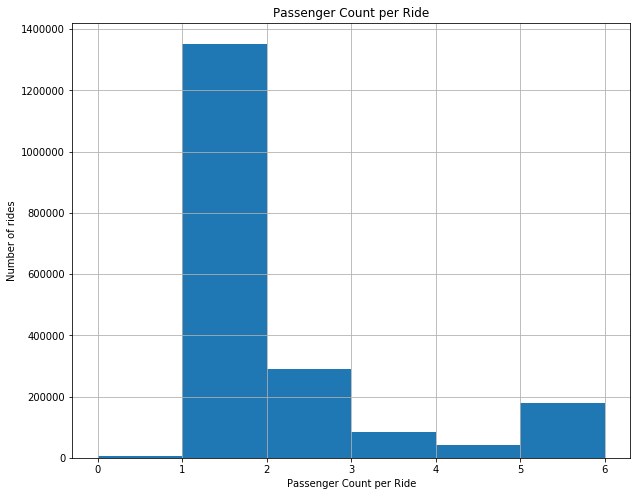

In [11]:
data.passenger_count.hist(bins=6,figsize=(10,8))
plt.xlabel('Passenger Count per Ride')
plt.ylabel('Number of rides')
plt.title('Passenger Count per Ride')
plt.savefig('Passenger_Count_per_Ride1.png',dpi=300, bbox_inches='tight')  
plt.show()

In [12]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.956912e+06,1.956912e+06,1.956912e+06,1.956912e+06,1.956912e+06,1.956912e+06
mean,1.128466e+01,-7.397546e+01,4.075070e+01,-7.397450e+01,4.075108e+01,1.684459e+00
std,9.371411e+00,3.525540e-02,2.952684e-02,3.496116e-02,3.319649e-02,1.306919e+00
min,2.500000e+00,-7.449450e+01,3.953896e+01,-7.449105e+01,3.953333e+01,0.000000e+00
25%,6.000000e+00,-7.399229e+01,4.073653e+01,-7.399159e+01,4.073551e+01,1.000000e+00
50%,8.500000e+00,-7.398210e+01,4.075332e+01,-7.398062e+01,4.075382e+01,1.000000e+00
75%,1.250000e+01,-7.396837e+01,4.076749e+01,-7.396539e+01,4.076838e+01,2.000000e+00
max,1.000000e+02,-7.263464e+01,4.123663e+01,-7.263464e+01,4.122475e+01,6.000000e+00


In [13]:
from scipy.spatial import distance 
import math
import numpy as np
def cartesiancoordinates(lat,lon):
    lat=math.radians(lat)
    lon=math.radians(lon)
    R=3959.0 #miles
    x = R * math.cos(lat) * math.cos(lon)
    y = R * math.cos(lat) * math.sin(lon)
    z = R * math.sin(lat)
    return [x,y,z]

def euclidean_dist(lat1, lon1, lat2, lon2):
    cor1 = cartesiancoordinates(lat1,lon1)
    cor2 = cartesiancoordinates(lat2,lon2)
    return (distance.euclidean(cor1,cor2)) 

def haversine(lat1, lon1, lat2, lon2):
    MILES = 3959
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    total_miles = MILES * c
    return total_miles

In [14]:
hav_distance = data.apply(lambda row: haversine(row['pickup_latitude'], row['pickup_longitude'],row['dropoff_latitude'], row['dropoff_longitude']), axis=1)
euc_distance = data.apply(lambda row: euclidean_dist(row['pickup_latitude'], row['pickup_longitude'],row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

In [15]:
timeOfDay = data.pickup_datetime.apply(lambda x: x.hour)

In [16]:
data['hour'] = pd.Series(timeOfDay)

In [17]:
data['euc_dist'] = pd.Series(euc_distance)
data['hav_dist'] = pd.Series(hav_distance)

In [18]:
import scipy.stats as stats
corrDisFare = stats.pearsonr(data.euc_dist,data.fare_amount)
print(corrDisFare)

(0.8174041609732976, 0.0)


In [19]:
corrDayDis = stats.pearsonr(timeOfDay,data.euc_dist)
print(corrDayDis)

(-0.027797141400169503, 0.0)


In [20]:
corrDayFare = stats.pearsonr(timeOfDay,data.fare_amount)
print(corrDayFare)

(-0.018358383068840203, 1.781171305703839e-145)


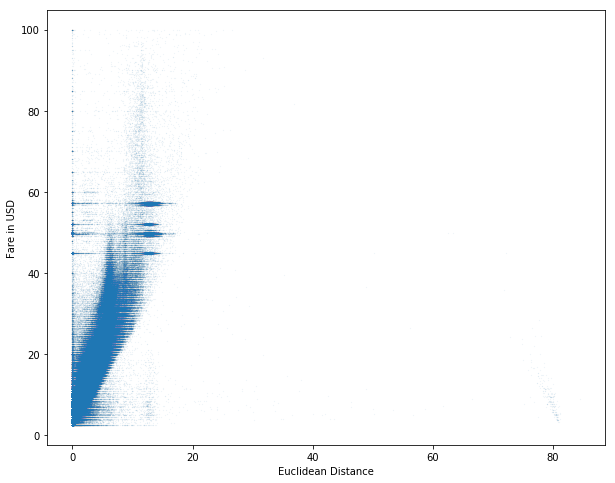

In [21]:
plt.figure(figsize=(10,8))
plt.plot(data.euc_dist,data.fare_amount,'.', markersize = 0.05)
plt.xlabel('Euclidean Distance')
plt.ylabel('Fare in USD')
plt.savefig('Dist-fare1.png', dpi=300, bbox_inches='tight')
plt.show()

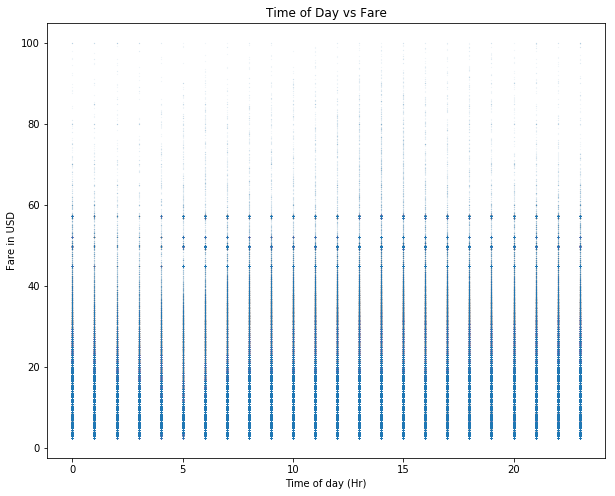

In [22]:
plt.figure(figsize=(10,8))
plt.plot(data['hour'],data.fare_amount,'.', markersize = 0.05)
plt.xlabel('Time of day (Hr)')
plt.ylabel('Fare in USD')
plt.title('Time of Day vs Fare')
plt.savefig('Time-fare1.png', dpi=300, bbox_inches='tight')
plt.show()

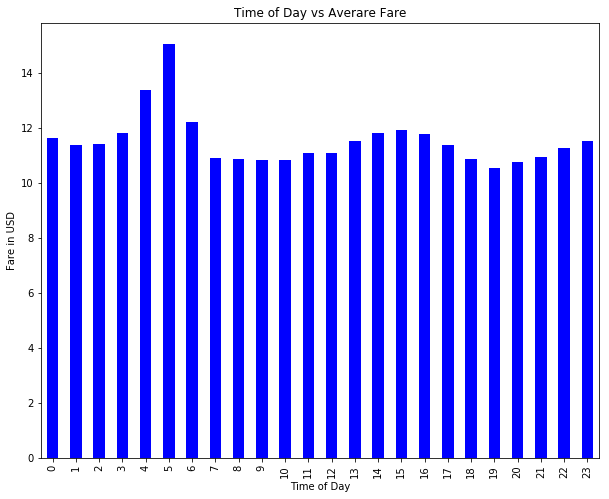

In [23]:
plt.figure(figsize=(10,8))
data.groupby('hour')['fare_amount'].mean().sort_index().plot.bar(color = 'b');
plt.title('Time of Day vs Averare Fare');
plt.xlabel('Time of Day')
plt.ylabel('Fare in USD');
plt.savefig('Avergae Time-fare1.png', dpi=300, bbox_inches='tight')
plt.show()

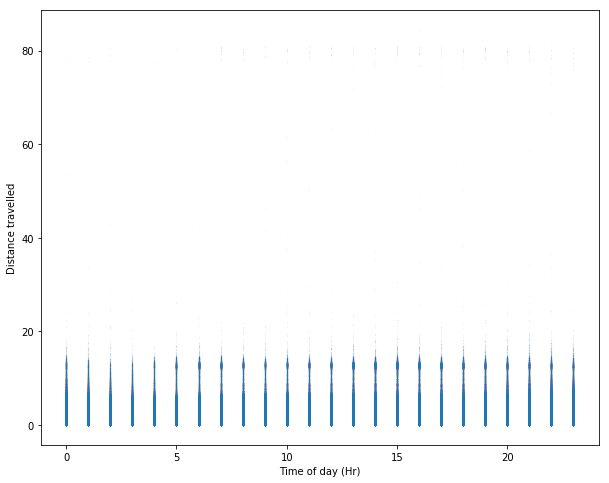

In [24]:
plt.figure(figsize=(10,8))
plt.plot(timeOfDay,data.euc_dist,'.', markersize = 0.05)
plt.xlabel('Time of day (Hr)')
plt.ylabel('Distance travelled')
plt.savefig('Time-dist1.png', dpi=300, bbox_inches='tight')
plt.show()

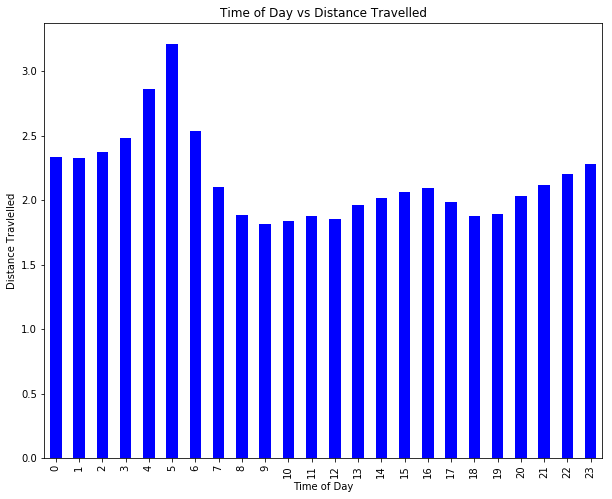

In [25]:
plt.figure(figsize=(10,8))
data.groupby('hour')['euc_dist'].mean().sort_index().plot.bar(color = 'b');
plt.title('Time of Day vs Distance Travelled');
plt.xlabel('Time of Day')
plt.ylabel('Distance Travlelled');
plt.savefig('Avergae Time- Distance1.png', dpi=300, bbox_inches='tight')
plt.show()

In [26]:
def Manhatten(lat1,long1,lat2,long2):
    cor1 = cartesiancoordinates(lat1,long1)
    cor2 = cartesiancoordinates(lat2,long2)
    return (distance.cityblock(cor1,cor2)) 

man_dist = data.apply(lambda row: Manhatten(row['pickup_latitude'], row['pickup_longitude'],row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

In [27]:
XT1 = data
XT2 = data

In [28]:
XT1.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,euc_dist,hav_dist
count,1.956912e+06,1.956912e+06,1.956912e+06,1.956912e+06,1.956912e+06,1.956912e+06,1.956912e+06,1.956912e+06,1.956912e+06
mean,1.128466e+01,-7.397546e+01,4.075070e+01,-7.397450e+01,4.075108e+01,1.684459e+00,1.350872e+01,2.065582e+00,2.065583e+00
std,9.371411e+00,3.525540e-02,2.952684e-02,3.496116e-02,3.319649e-02,1.306919e+00,6.513837e+00,2.363088e+00,2.363093e+00
min,2.500000e+00,-7.449450e+01,3.953896e+01,-7.449105e+01,3.953333e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,-7.399229e+01,4.073653e+01,-7.399159e+01,4.073551e+01,1.000000e+00,9.000000e+00,7.792551e-01,7.792551e-01
50%,8.500000e+00,-7.398210e+01,4.075332e+01,-7.398062e+01,4.075382e+01,1.000000e+00,1.400000e+01,1.337363e+00,1.337363e+00
75%,1.250000e+01,-7.396837e+01,4.076749e+01,-7.396539e+01,4.076838e+01,2.000000e+00,1.900000e+01,2.431398e+00,2.431398e+00
max,1.000000e+02,-7.263464e+01,4.123663e+01,-7.263464e+01,4.122475e+01,6.000000e+00,2.300000e+01,8.445812e+01,8.445972e+01


In [29]:
XT1=XT1.drop('fare_amount',axis=1)
XT1=XT1.drop('euc_dist',axis=1)
XT1=XT1.drop('hav_dist',axis=1)

In [30]:
Y = data['fare_amount']

In [31]:
XT1=XT1.drop('key',axis=1)
XT1=XT1.drop('pickup_datetime',axis=1)

In [32]:
XT1['euc_dis'] = pd.Series(euc_distance)

In [33]:
XT1 = XT1.drop('pickup_longitude',axis=1)
XT1 = XT1.drop('pickup_latitude',axis=1)
XT1 = XT1.drop('dropoff_longitude',axis=1)
XT1 = XT1.drop('dropoff_latitude',axis=1)

In [34]:
XT1.head()

,passenger_count,hour,euc_dis
0,1,17,0.640527
1,1,16,5.250993
2,2,0,0.863464
3,1,4,1.739493
4,1,7,1.242295


In [35]:

Y.head()

0     4.5
1    16.9
2     5.7
3     7.7
4     5.3
Name: fare_amount, dtype: float64

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_Test,Y_Train,y_Test = train_test_split(XT1,Y,test_size=0.2)

from sklearn import linear_model
linear_m = linear_model.LinearRegression()
model = linear_m.fit(X_train,Y_Train) 


In [37]:
linear_m.coef_

array([0.05171055, 0.005676  , 3.23407596])

In [38]:
linear_m.intercept_

4.441398535110514

In [39]:
predictions = linear_m.predict(X_Test)

In [40]:
from sklearn import metrics
mse = metrics.mean_squared_error(y_Test, predictions)
np.sqrt(mse)

5.348890514933488

In [41]:
path_toFile ="/Users/krapi/Documents/NYC2/NYCFare/test.csv"
testData = pd.read_csv(path_toFile,encoding='utf-8',parse_dates = ['pickup_datetime'])
print(type(testData))

<class 'pandas.core.frame.DataFrame'>


In [42]:
euc_dist =testData.apply(lambda row: euclidean_dist(row['pickup_latitude'], row['pickup_longitude'],row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

In [43]:
timeOfDay = testData.pickup_datetime.apply(lambda x: x.hour)

In [44]:
testData['hour'] = timeOfDay

In [45]:
testData=testData.drop('pickup_datetime',axis=1)
testData=testData.drop('pickup_longitude',axis=1)
testData=testData.drop('pickup_latitude',axis=1)
testData=testData.drop('dropoff_longitude',axis=1)
testData=testData.drop('dropoff_latitude',axis=1)

In [46]:
sub = pd.DataFrame()
sub['key'] = testData['key']

In [47]:
testData['euc_dis'] = pd.Series(euc_dist)

In [48]:
testData.head()

,key,passenger_count,hour,euc_dis
0,2015-01-27 13:08:24.0000002,1,13,1.443696
1,2015-01-27 13:08:24.0000003,1,13,1.507137
2,2011-10-08 11:53:44.0000002,1,11,0.384421
3,2012-12-01 21:12:12.0000002,1,21,1.218604
4,2012-12-01 21:12:12.0000003,1,21,3.347720


In [49]:
testData=testData.drop('key',axis=1)
predictions = linear_m.predict(testData)
sub['fare_amount'] = pd.Series(predictions)
sub.to_csv("NYCFairPredRe 2",index=False)

In [50]:
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,euc_dist,hav_dist
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,17,0.640527,0.640527
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,16,5.250993,5.250993
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0,0.863464,0.863464
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,4,1.739493,1.739493
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,7,1.242295,1.242295


In [51]:
XT1.head()

,passenger_count,hour,euc_dis
0,1,17,0.640527
1,1,16,5.250993
2,2,0,0.863464
3,1,4,1.739493
4,1,7,1.242295


In [52]:
XT2.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,euc_dist,hav_dist
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,17,0.640527,0.640527
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,16,5.250993,5.250993
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0,0.863464,0.863464
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,4,1.739493,1.739493
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,7,1.242295,1.242295


In [53]:
XT2=data
XT2 = XT2.drop('hav_dist',axis=1)

In [54]:
year = XT2.pickup_datetime.apply(lambda x: x.year)

In [55]:
XT2['year'] = pd.Series(year)

In [56]:
XT2.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,euc_dist,year
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,17,0.640527,2009
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,16,5.250993,2010
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0,0.863464,2011
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,4,1.739493,2012
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,7,1.242295,2010


In [57]:
XT2=XT2.drop('key',axis=1)

In [58]:
Y = XT2.fare_amount

In [59]:
XT2=XT2.drop('pickup_datetime',axis=1)
XT2=XT2.drop('fare_amount',axis=1)
XT2.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,euc_dist,year
0,-73.844311,40.721319,-73.841610,40.712278,1,17,0.640527,2009
1,-74.016048,40.711303,-73.979268,40.782004,1,16,5.250993,2010
2,-73.982738,40.761270,-73.991242,40.750562,2,0,0.863464,2011
3,-73.987130,40.733143,-73.991567,40.758092,1,4,1.739493,2012
4,-73.968095,40.768008,-73.956655,40.783762,1,7,1.242295,2010


In [60]:

from sklearn.model_selection import train_test_split
X_train,X_Test,Y_Train,y_Test = train_test_split(XT2,Y,test_size=0.2)

from sklearn import linear_model
linear_m = linear_model.LinearRegression()
model = linear_m.fit(X_train,Y_Train) 

In [61]:
linear_m.coef_

array([ 2.78500423e+01,  1.01066956e+01,  5.69475158e+00, -9.85904032e+00,
        5.14249658e-02,  2.15566808e-03,  3.03710770e+00,  5.07579980e-01])

In [62]:
linear_m.intercept_

1455.1732581158437

In [63]:
predictions = linear_m.predict(X_Test)

In [64]:
from sklearn import metrics
mse = metrics.mean_squared_error(y_Test, predictions)
np.sqrt(mse)

5.205124533415148

In [65]:
path_toFile ="/Users/krapi/Documents/NYC2/NYCFare/test.csv"
testData = pd.read_csv(path_toFile,encoding='utf-8',parse_dates = ['pickup_datetime'])
print(type(testData))

<class 'pandas.core.frame.DataFrame'>


In [66]:
XT2.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,euc_dist,year
0,-73.844311,40.721319,-73.841610,40.712278,1,17,0.640527,2009
1,-74.016048,40.711303,-73.979268,40.782004,1,16,5.250993,2010
2,-73.982738,40.761270,-73.991242,40.750562,2,0,0.863464,2011
3,-73.987130,40.733143,-73.991567,40.758092,1,4,1.739493,2012
4,-73.968095,40.768008,-73.956655,40.783762,1,7,1.242295,2010


In [67]:
Ypredict = pd.DataFrame()
Ypredict['key'] = testData.key

In [68]:
hour = testData.pickup_datetime.apply(lambda x: x.hour)
euc_dist =testData.apply(lambda row: euclidean_dist(row['pickup_latitude'], row['pickup_longitude'],row['dropoff_latitude'], row['dropoff_longitude']), axis=1)
year = testData.pickup_datetime.apply(lambda x: x.year)

In [69]:
testData['hour'] = pd.Series(hour)
testData['euc_dist'] = pd.Series(euc_dist)
testData['year'] = pd.Series(year)

In [70]:
testData.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,euc_dist,year
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,13,1.443696,2015
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,13,1.507137,2015
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,11,0.384421,2011
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,21,1.218604,2012
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,21,3.347720,2012


In [71]:
testData = testData.drop('key',axis=1)
testData=testData.drop('pickup_datetime',axis=1)

In [72]:
XT2.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,euc_dist,year
0,-73.844311,40.721319,-73.841610,40.712278,1,17,0.640527,2009
1,-74.016048,40.711303,-73.979268,40.782004,1,16,5.250993,2010
2,-73.982738,40.761270,-73.991242,40.750562,2,0,0.863464,2011
3,-73.987130,40.733143,-73.991567,40.758092,1,4,1.739493,2012
4,-73.968095,40.768008,-73.956655,40.783762,1,7,1.242295,2010


In [73]:
testData.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,euc_dist,year
0,-73.973320,40.763805,-73.981430,40.743835,1,13,1.443696,2015
1,-73.986862,40.719383,-73.998886,40.739201,1,13,1.507137,2015
2,-73.982524,40.751260,-73.979654,40.746139,1,11,0.384421,2011
3,-73.981160,40.767807,-73.990448,40.751635,1,21,1.218604,2012
4,-73.966046,40.789775,-73.988565,40.744427,1,21,3.347720,2012


In [74]:
predictions = linear_m.predict(testData)

In [75]:
Ypredict['fare_amount'] = pd.Series(predictions)
Ypredict.to_csv("NYCFairPredRe 3",index=False)

In [76]:
XT2=XT2.drop('pickup_longitude',axis=1)
XT2=XT2.drop('pickup_latitude',axis=1)
XT2=XT2.drop('dropoff_longitude',axis=1)
XT2=XT2.drop('dropoff_latitude',axis=1)

In [77]:
XT2.head()

,passenger_count,hour,euc_dist,year
0,1,17,0.640527,2009
1,1,16,5.250993,2010
2,2,0,0.863464,2011
3,1,4,1.739493,2012
4,1,7,1.242295,2010


In [78]:
X_train,X_Test,Y_Train,y_Test = train_test_split(XT2,Y,test_size=0.2)
linear_m = linear_model.LinearRegression()
model = linear_m.fit(X_train,Y_Train) 

In [79]:
linear_m.coef_

array([0.04506003, 0.00579038, 3.24309819, 0.51049673])

In [80]:
linear_m.intercept_

-1022.5549314226953

In [81]:
predictions = linear_m.predict(X_Test)

In [82]:
from sklearn import metrics
mse = metrics.mean_squared_error(y_Test, predictions)
np.sqrt(mse)

5.417371732014007

In [83]:
testData.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,euc_dist,year
0,-73.973320,40.763805,-73.981430,40.743835,1,13,1.443696,2015
1,-73.986862,40.719383,-73.998886,40.739201,1,13,1.507137,2015
2,-73.982524,40.751260,-73.979654,40.746139,1,11,0.384421,2011
3,-73.981160,40.767807,-73.990448,40.751635,1,21,1.218604,2012
4,-73.966046,40.789775,-73.988565,40.744427,1,21,3.347720,2012


In [84]:
testData=testData.drop('pickup_longitude',axis=1)
testData=testData.drop('pickup_latitude',axis=1)
testData=testData.drop('dropoff_longitude',axis=1)
testData=testData.drop('dropoff_latitude',axis=1)


In [85]:
predictions = linear_m.predict(testData)

In [86]:
Ypredict['fare_amount'] = pd.Series(predictions)
Ypredict.to_csv("NYCFairPredRe 4",index=False)

In [87]:
XT2 = data
XT2['diffLat'] = (XT2.pickup_latitude - XT2.dropoff_latitude).abs()

In [88]:
XT2['diffLong'] = (XT2.pickup_longitude - XT2.dropoff_longitude).abs()

In [89]:
XT2.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,euc_dist,hav_dist,diffLat,diffLong
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,17,0.640527,0.640527,0.009041,0.002701
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,16,5.250993,5.250993,0.070701,0.036780
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0,0.863464,0.863464,0.010708,0.008504
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,4,1.739493,1.739493,0.024949,0.004437
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,7,1.242295,1.242295,0.015754,0.011440


In [90]:
XT2['year'] =  XT2.pickup_datetime.apply(lambda x: x.year)

In [91]:
XT2=XT2.drop('key',axis=1)
XT2=XT2.drop('fare_amount',axis=1)
XT2=XT2.drop('hav_dist',axis=1)
XT2=XT2.drop('pickup_datetime',axis=1)

In [92]:
XT2=XT2.drop('pickup_latitude',axis=1)

In [93]:
XT2.head()

,pickup_longitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,euc_dist,diffLat,diffLong,year
0,-73.844311,-73.841610,40.712278,1,17,0.640527,0.009041,0.002701,2009
1,-74.016048,-73.979268,40.782004,1,16,5.250993,0.070701,0.036780,2010
2,-73.982738,-73.991242,40.750562,2,0,0.863464,0.010708,0.008504,2011
3,-73.987130,-73.991567,40.758092,1,4,1.739493,0.024949,0.004437,2012
4,-73.968095,-73.956655,40.783762,1,7,1.242295,0.015754,0.011440,2010


In [94]:
X_train,X_Test,Y_Train,y_Test = train_test_split(XT2,Y,test_size=0.2)
linear_m = linear_model.LinearRegression()
model = linear_m.fit(X_train,Y_Train) 

In [95]:
linear_m.coef_

array([ 9.02707905e+00, -5.52242981e+00, -6.82574310e+00,  3.85686934e-02,
        7.88837837e-03,  1.24139621e+00,  2.81446968e+01,  1.40748804e+02,
        4.91404124e-01])

In [96]:
linear_m.intercept_

-446.3954612183014

In [97]:
predictions = linear_m.predict(X_Test)

In [98]:
mse = metrics.mean_squared_error(y_Test, predictions)
np.sqrt(mse)

4.750967004392205

In [110]:
path_toFile ="/Users/krapi/Documents/NYC2/NYCFare/test.csv"
testData = pd.read_csv(path_toFile,encoding='utf-8',parse_dates = ['pickup_datetime'])
print(type(testData))

<class 'pandas.core.frame.DataFrame'>


In [111]:
testData.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1


In [112]:
hour = testData.pickup_datetime.apply(lambda x: x.hour)
euc_dist =testData.apply(lambda row: euclidean_dist(row['pickup_latitude'], row['pickup_longitude'],row['dropoff_latitude'], row['dropoff_longitude']), axis=1)
year = testData.pickup_datetime.apply(lambda x: x.year)
diffLat = (testData.pickup_latitude - testData.dropoff_latitude).abs()
diffLong = (testData.pickup_longitude - testData.dropoff_longitude).abs()

In [113]:
Y.head()

0     4.5
1    16.9
2     5.7
3     7.7
4     5.3
Name: fare_amount, dtype: float64

In [114]:
XT2.head()

,pickup_longitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,euc_dist,diffLat,diffLong,year
0,-73.844311,-73.841610,40.712278,1,17,0.640527,0.009041,0.002701,2009
1,-74.016048,-73.979268,40.782004,1,16,5.250993,0.070701,0.036780,2010
2,-73.982738,-73.991242,40.750562,2,0,0.863464,0.010708,0.008504,2011
3,-73.987130,-73.991567,40.758092,1,4,1.739493,0.024949,0.004437,2012
4,-73.968095,-73.956655,40.783762,1,7,1.242295,0.015754,0.011440,2010


In [115]:
testData['hour']= pd.Series(hour)
testData['euc_dist'] = pd.Series(euc_dist)
testData['diffLat']=pd.Series(diffLat)
testData['diffLong']=pd.Series(diffLong)
testData['year']=pd.Series(year)

In [116]:
testData.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,euc_dist,diffLat,diffLong,year
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,13,1.443696,0.019970,0.008110,2015
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,13,1.507137,0.019817,0.012024,2015
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,11,0.384421,0.005121,0.002870,2011
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,21,1.218604,0.016172,0.009288,2012
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,21,3.347720,0.045348,0.022519,2012


In [118]:
testData= testData.drop('key',axis=1)
testData=testData.drop('pickup_datetime',axis=1)

In [122]:
testData.head()
testData=testData.drop('pickup_latitude',axis=1)

In [123]:
predictions = linear_m.predict(testData)

In [124]:
Ypredict['fare_amount'] = pd.Series(predictions)
Ypredict.to_csv("NYCFairPredRe 6",index=False)

In [125]:
XT2 = data

In [126]:
Y.describe()

count    1.956912e+06
mean     1.128466e+01
std      9.371411e+00
min      2.500000e+00
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      1.000000e+02
Name: fare_amount, dtype: float64

In [127]:
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,euc_dist,hav_dist,diffLat,diffLong,year
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,17,0.640527,0.640527,0.009041,0.002701,2009
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,16,5.250993,5.250993,0.070701,0.036780,2010
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0,0.863464,0.863464,0.010708,0.008504,2011
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,4,1.739493,1.739493,0.024949,0.004437,2012
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,7,1.242295,1.242295,0.015754,0.011440,2010


In [128]:
data['month'] = data.pickup_datetime.apply(lambda x: x.month)
data['day'] = data.pickup_datetime.apply(lambda x: x.day)
data['day_of_week'] = data.pickup_datetime.apply(lambda x: x.weekday())

In [129]:
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,euc_dist,hav_dist,diffLat,diffLong,year,month,day,day_of_week
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,17,0.640527,0.640527,0.009041,0.002701,2009,6,15,0
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,16,5.250993,5.250993,0.070701,0.036780,2010,1,5,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0,0.863464,0.863464,0.010708,0.008504,2011,8,18,3
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,4,1.739493,1.739493,0.024949,0.004437,2012,4,21,5
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,7,1.242295,1.242295,0.015754,0.011440,2010,3,9,1


In [130]:
data.to_csv("Clean2000000dataRe.csv",index=False)

In [131]:
corrDayFare = stats.pearsonr(data.diffLat,data.euc_dist)
print(corrDayFare)

(0.8731390813879022, 0.0)


In [147]:
locationsN = pd.DataFrame()
locationsN['latitude']= list(data.pickup_latitude) + list(data.dropoff_latitude)
locationsN['longitude'] = list(data.pickup_longitude) + list(data.dropoff_longitude)

In [148]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5).fit(locationsN)

In [150]:
locationsN.head()

,latitude,longitude
0,40.721319,-73.844311
1,40.711303,-74.016048
2,40.761270,-73.982738
3,40.733143,-73.987130
4,40.768008,-73.968095


In [151]:
locationsN['label'] = kmeans.labels_

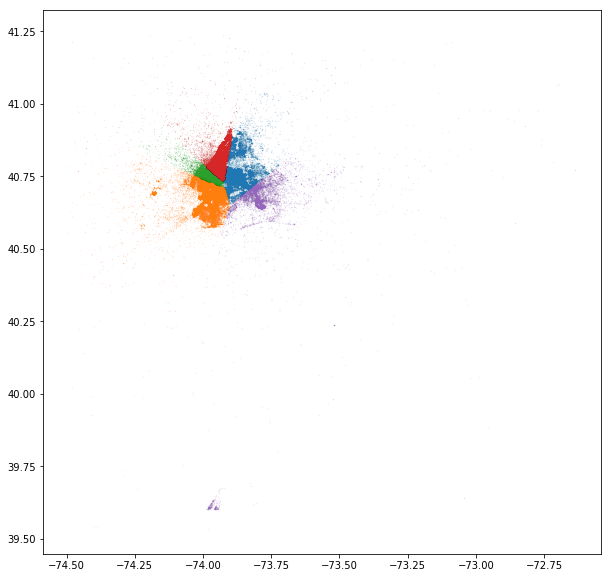

In [152]:
plt.figure(figsize=(10,10))
for label in locationsN.label.unique():
    plt.plot(locationsN.longitude[locationsN.label == label],locations.latitude[locationsN.label == label],'.', alpha = 0.3, markersize = 0.3)


In [153]:
kmeans.cluster_centers_ 

array([[ 40.75494125, -73.98274482],
       [ 40.76562487, -73.87655453],
       [ 40.78229928, -73.95955388],
       [ 40.64463477, -73.78496178],
       [ 40.72152686, -73.99580048]])

In [154]:
set(kmeans.labels_)

{0, 1, 2, 3, 4}

In [155]:
locations.head()

,latitude,longitude,label
0,40.721319,-73.844311,3
1,40.711303,-74.016048,5
2,40.761270,-73.982738,1
3,40.733143,-73.987130,8
4,40.768008,-73.968095,2


In [164]:
locationsN=locationsN.drop('label',axis=1)
kmeans = KMeans(n_clusters=10).fit(locationsN)

Text(0.5,0,'Labels')

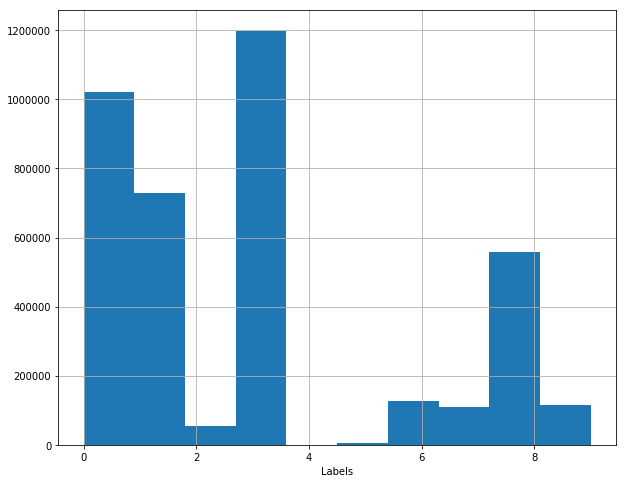

In [165]:
locationsN['label'] = kmeans.labels_
locationsN.label.hist(bins=10,figsize=(10,8))
plt.xlabel('Labels')

In [166]:
kmeans.cluster_centers_ 

array([[ 40.74205647, -73.99144896],
       [ 40.77746461, -73.95921626],
       [ 40.6530193 , -73.78261753],
       [ 40.76073566, -73.97891452],
       [ 39.64485366, -73.96079529],
       [ 40.68375638, -74.18365855],
       [ 40.68704169, -73.96768538],
       [ 40.7647967 , -73.87390298],
       [ 40.71996475, -74.00107342],
       [ 40.8167898 , -73.9475169 ]])

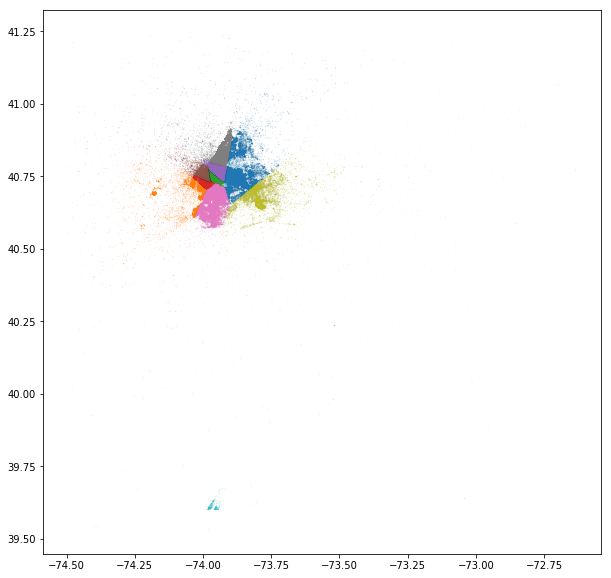

In [167]:
plt.figure(figsize=(10,10))
for label in locations.label.unique():
    plt.plot(locations.longitude[locations.label == label],locations.latitude[locations.label == label],'.', alpha = 0.3, markersize = 0.3)
    

In [168]:
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,euc_dist,hav_dist,diffLat,diffLong,year,month,day,day_of_week
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,17,0.640527,0.640527,0.009041,0.002701,2009,6,15,0
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,16,5.250993,5.250993,0.070701,0.036780,2010,1,5,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0,0.863464,0.863464,0.010708,0.008504,2011,8,18,3
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,4,1.739493,1.739493,0.024949,0.004437,2012,4,21,5
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,7,1.242295,1.242295,0.015754,0.011440,2010,3,9,1


In [169]:
data['pickup_cluster'] = kmeans.predict(data[['pickup_latitude','pickup_longitude']])

In [170]:
data['dropoff_cluster'] = kmeans.predict(data[['dropoff_latitude','dropoff_longitude']])

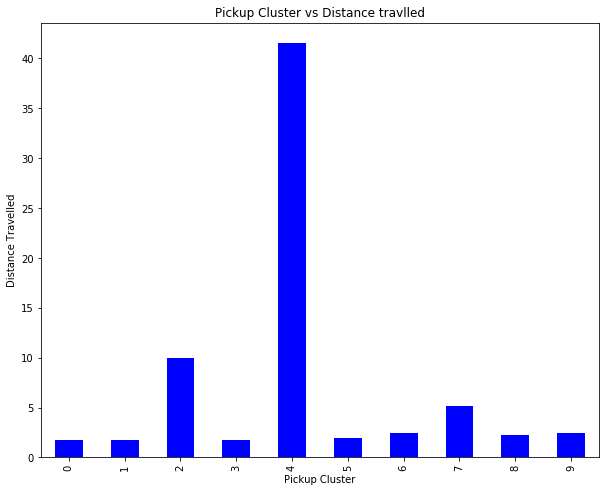

In [171]:
plt.figure(figsize=(10,8))
data.groupby('pickup_cluster')['euc_dist'].mean().sort_index().plot.bar(color = 'b');
plt.title('Pickup Cluster vs Distance travlled');
plt.xlabel('Pickup Cluster')
plt.ylabel('Distance Travelled');
plt.savefig('pickCluster-Dist1.png', dpi=300, bbox_inches='tight')
plt.show()

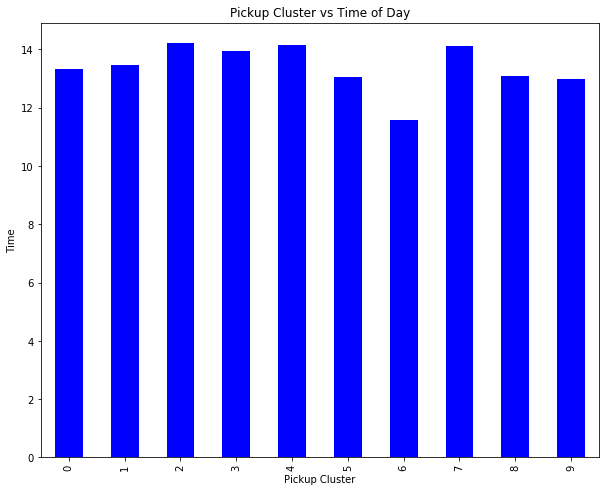

In [172]:
plt.figure(figsize=(10,8))
data.groupby('pickup_cluster')['hour'].mean().sort_index().plot.bar(color = 'b');
plt.title('Pickup Cluster vs Time of Day');
plt.xlabel('Pickup Cluster')
plt.ylabel('Time');
plt.savefig('pickCluster-time1.png', dpi=300, bbox_inches='tight')
plt.show()

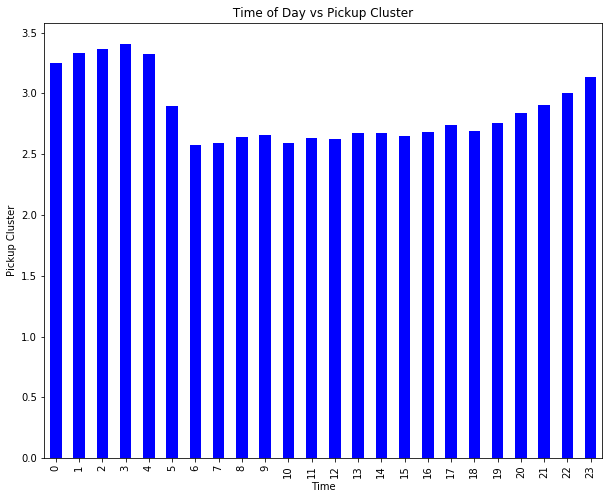

In [175]:
plt.figure(figsize=(10,8))
data.groupby('hour')['pickup_cluster'].mean().sort_index().plot.bar(color = 'b');
plt.title(' Time of Day vs Pickup Cluster ');
plt.ylabel('Pickup Cluster')
plt.xlabel('Time');
plt.savefig('pickCluster-timeXY1.png', dpi=300, bbox_inches='tight')
plt.show()

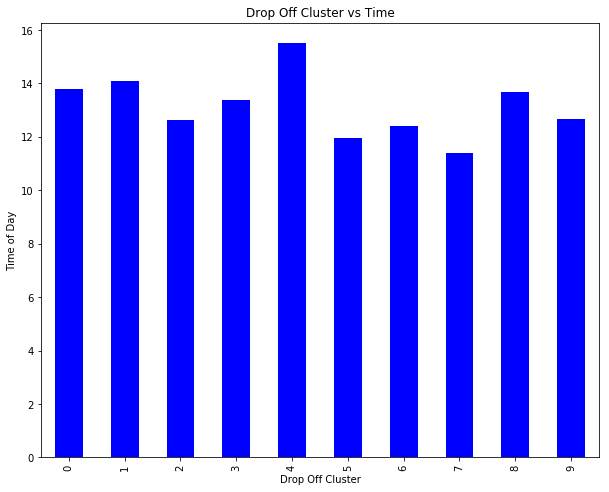

In [177]:
plt.figure(figsize=(10,8))
data.groupby('dropoff_cluster')['hour'].mean().sort_index().plot.bar(color = 'b');
plt.title('Drop Off Cluster vs Time');
plt.xlabel('Drop Off Cluster')
plt.ylabel('Time of Day');
plt.savefig('dropCluster-time.png', dpi=300, bbox_inches='tight')
plt.show()

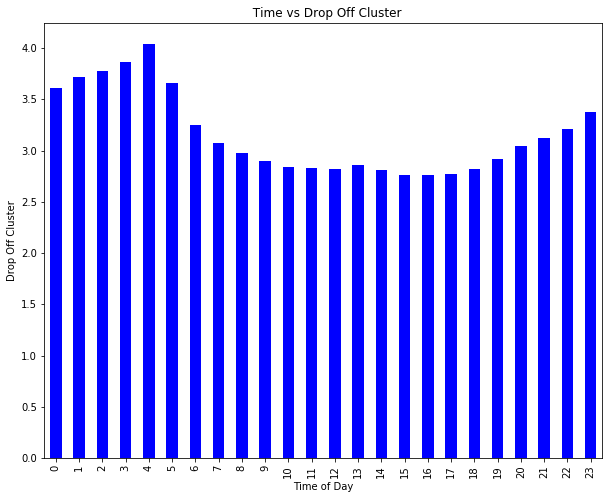

In [178]:
plt.figure(figsize=(10,8))
data.groupby('hour')['dropoff_cluster'].mean().sort_index().plot.bar(color = 'b');
plt.title('  Time vs Drop Off Cluster');
plt.ylabel('Drop Off Cluster')
plt.xlabel('Time of Day');
plt.savefig('dropCluster-timexy.png', dpi=300, bbox_inches='tight')
plt.show()

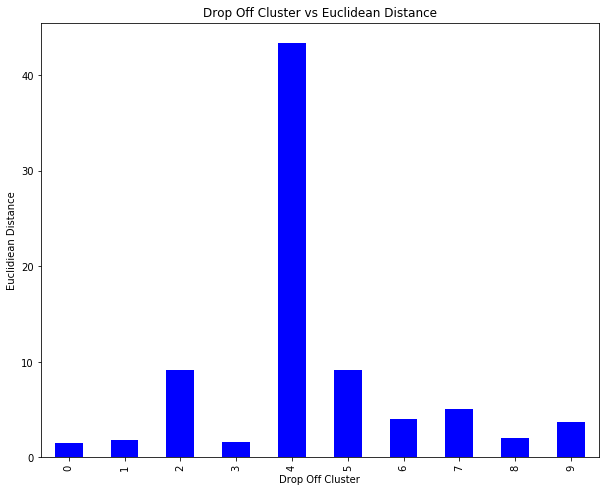

In [179]:
plt.figure(figsize=(10,8))
data.groupby('dropoff_cluster')['euc_dist'].mean().sort_index().plot.bar(color = 'b');
plt.title('Drop Off Cluster vs Euclidean Distance');
plt.xlabel('Drop Off Cluster')
plt.ylabel('Euclidiean Distance');
plt.savefig('dropCluster-dist1.png', dpi=300, bbox_inches='tight')
plt.show()

In [180]:
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,euc_dist,hav_dist,diffLat,diffLong,year,month,day,day_of_week,pickup_cluster,dropoff_cluster
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,17,0.640527,0.640527,0.009041,0.002701,2009,6,15,0,7,7
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,16,5.250993,5.250993,0.070701,0.036780,2010,1,5,1,8,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0,0.863464,0.863464,0.010708,0.008504,2011,8,18,3,3,0
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,4,1.739493,1.739493,0.024949,0.004437,2012,4,21,5,0,3
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,7,1.242295,1.242295,0.015754,0.011440,2010,3,9,1,1,1


In [181]:
data.to_csv("SmallCleanDataClusters.csv",index=False)

In [182]:
XT3=data

In [183]:
XT3.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,euc_dist,hav_dist,diffLat,diffLong,year,month,day,day_of_week,pickup_cluster,dropoff_cluster
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,17,0.640527,0.640527,0.009041,0.002701,2009,6,15,0,7,7
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,16,5.250993,5.250993,0.070701,0.036780,2010,1,5,1,8,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0,0.863464,0.863464,0.010708,0.008504,2011,8,18,3,3,0
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,4,1.739493,1.739493,0.024949,0.004437,2012,4,21,5,0,3
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,7,1.242295,1.242295,0.015754,0.011440,2010,3,9,1,1,1


In [184]:
Y=XT3['fare_amount']

In [185]:
XT3 = XT3.drop('key',axis=1)
XT3=XT3.drop('pickup_datetime',axis=1)
XT3 = XT3.drop('pickup_longitude',axis=1)
XT3 = XT3.drop('pickup_latitude',axis=1)
XT3=XT3.drop('dropoff_longitude',axis=1)
XT3 =XT3.drop('dropoff_latitude',axis=1)

In [186]:
XT3=XT3.drop('hav_dist',axis=1)

In [187]:
XT3.head()

,fare_amount,passenger_count,hour,euc_dist,diffLat,diffLong,year,month,day,day_of_week,pickup_cluster,dropoff_cluster
0,4.5,1,17,0.640527,0.009041,0.002701,2009,6,15,0,7,7
1,16.9,1,16,5.250993,0.070701,0.036780,2010,1,5,1,8,1
2,5.7,2,0,0.863464,0.010708,0.008504,2011,8,18,3,3,0
3,7.7,1,4,1.739493,0.024949,0.004437,2012,4,21,5,0,3
4,5.3,1,7,1.242295,0.015754,0.011440,2010,3,9,1,1,1


In [188]:
XT3.head()

,fare_amount,passenger_count,hour,euc_dist,diffLat,diffLong,year,month,day,day_of_week,pickup_cluster,dropoff_cluster
0,4.5,1,17,0.640527,0.009041,0.002701,2009,6,15,0,7,7
1,16.9,1,16,5.250993,0.070701,0.036780,2010,1,5,1,8,1
2,5.7,2,0,0.863464,0.010708,0.008504,2011,8,18,3,3,0
3,7.7,1,4,1.739493,0.024949,0.004437,2012,4,21,5,0,3
4,5.3,1,7,1.242295,0.015754,0.011440,2010,3,9,1,1,1


In [208]:
XT3 = XT3.drop('fare_amount',axis=1)

In [209]:
X_train,X_Test,Y_Train,y_Test = train_test_split(XT3,Y,test_size=0.2)
linear_m = linear_model.LinearRegression()
model = linear_m.fit(X_train,Y_Train) 

In [210]:
linear_m.coef_

array([ 3.83295156e-02,  1.19901791e-02,  1.37143008e+00,  2.05425969e+01,
        1.36448865e+02,  5.06012533e-01,  7.49876495e-02,  1.20301542e-03,
       -2.83270257e-02,  7.49299145e-02,  1.37513785e-01])

In [211]:
linear_m.intercept_

-1014.2988707085887

In [212]:
predictions = linear_m.predict(X_Test)

In [213]:
from sklearn import metrics
mse = metrics.mean_squared_error(y_Test, predictions)
np.sqrt(mse)

4.715603268483998

In [228]:
path_toFile ="/Users/krapi/Documents/NYC2/NYCFare/test.csv"
testData = pd.read_csv(path_toFile,encoding='utf-8',parse_dates = ['pickup_datetime'])
print(type(testData))

<class 'pandas.core.frame.DataFrame'>


In [229]:
hour = testData.pickup_datetime.apply(lambda x: x.hour)
euc_dist =testData.apply(lambda row: euclidean_dist(row['pickup_latitude'], row['pickup_longitude'],row['dropoff_latitude'], row['dropoff_longitude']), axis=1)
year = testData.pickup_datetime.apply(lambda x: x.year)
month=testData.pickup_datetime.apply(lambda x:x.month)

In [230]:
diffLat = (testData.pickup_latitude - testData.dropoff_latitude).abs()
diffLong = (testData.pickup_longitude - testData.dropoff_longitude).abs()

In [231]:
testData['hour']= pd.Series(hour)
testData['euc_dist'] = pd.Series(euc_dist)
testData['diffLat'] = pd.Series(euc_dist)
testData['diffLong'] = pd.Series(euc_dist)
testData['year']=pd.Series(year)
testData['month']= pd.Series(month)



In [232]:
testData.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,euc_dist,diffLat,diffLong,year,month
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,13,1.443696,1.443696,1.443696,2015,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,13,1.507137,1.507137,1.507137,2015,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,11,0.384421,0.384421,0.384421,2011,10
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,21,1.218604,1.218604,1.218604,2012,12
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,21,3.347720,3.347720,3.347720,2012,12


In [233]:
pickUp = kmeans.predict(testData[['pickup_latitude','pickup_longitude']])
dropOff = kmeans.predict(testData[['dropoff_latitude','dropoff_longitude']])

In [237]:
day = testData.pickup_datetime.apply(lambda x: x.day)
day_of_week=testData.pickup_datetime.apply(lambda x:x.weekday())

In [238]:
testData['day']=pd.Series(day)
testData['day_of_week']= pd.Series(day_of_week)
testData['pickup_cluster']= pd.Series(pickUp)
testData['dropoff_cluster']= pd.Series(dropOff)

In [241]:

testData=testData.drop('pickup_longitude',axis=1)
testData=testData.drop('pickup_latitude',axis=1)
testData=testData.drop('dropoff_longitude',axis=1)
testData=testData.drop('dropoff_latitude',axis=1)
testData=testData.drop('pickup_datetime',axis=1)



In [242]:



testData.head()

,passenger_count,hour,euc_dist,diffLat,diffLong,year,month,day,day_of_week,pickup_cluster,dropoff_cluster
0,1,13,1.443696,1.443696,1.443696,2015,1,27,1,3,0
1,1,13,1.507137,1.507137,1.507137,2015,1,27,1,8,0
2,1,11,0.384421,0.384421,0.384421,2011,10,8,5,3,0
3,1,21,1.218604,1.218604,1.218604,2012,12,1,5,3,0
4,1,21,3.347720,3.347720,3.347720,2012,12,1,5,1,0


In [243]:
predictions = linear_m.predict(testData)

In [244]:
Ypredict['fare_amount'] = pd.Series(predictions)
Ypredict.to_csv("NYCFairPredRe 7",index=False)

In [245]:
XT2.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,euc_dist,hav_dist,diffLat,diffLong,year,month,day,day_of_week,pickup_cluster,dropoff_cluster
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,17,0.640527,0.640527,0.009041,0.002701,2009,6,15,0,7,7
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,16,5.250993,5.250993,0.070701,0.036780,2010,1,5,1,8,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0,0.863464,0.863464,0.010708,0.008504,2011,8,18,3,3,0
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,4,1.739493,1.739493,0.024949,0.004437,2012,4,21,5,0,3
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,7,1.242295,1.242295,0.015754,0.011440,2010,3,9,1,1,1


In [246]:
from sklearn.linear_model import Ridge
import math
def ridge_regression(data, target, alpha):
    X_train,X_Test,Y_Train,y_Test = train_test_split(data,target,test_size=0.2)
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(X_train,Y_Train)
    y_pred = ridgereg.predict(X_Test)
    
    rss = sum((y_pred-y_Test)**2)
    ret = [math.sqrt(rss)]
    return ret
    

In [249]:
ridgeData=XT3
alpha_check=[0.0000000001,0.0000001,0.0000001]
ridgeTrain =[]
for i in alpha_check:
    ridgeTrain.append(ridge_regression(ridgeData,Y,i))

In [250]:
ridgeTrain

[[2946.6891413557805], [3025.80204345105], [2977.190993167518]]

In [251]:
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,euc_dist,hav_dist,diffLat,diffLong,year,month,day,day_of_week,pickup_cluster,dropoff_cluster
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,17,0.640527,0.640527,0.009041,0.002701,2009,6,15,0,7,7
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,16,5.250993,5.250993,0.070701,0.036780,2010,1,5,1,8,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0,0.863464,0.863464,0.010708,0.008504,2011,8,18,3,3,0
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,4,1.739493,1.739493,0.024949,0.004437,2012,4,21,5,0,3
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,7,1.242295,1.242295,0.015754,0.011440,2010,3,9,1,1,1


In [252]:
XTrainCluster = data

In [253]:
XTrainCluster=XTrainCluster.drop('key',axis=1)
XTrainCluster=XTrainCluster.drop('pickup_datetime',axis=1)

In [254]:
XTrainCluster=XTrainCluster.drop('pickup_longitude',axis=1)
XTrainCluster=XTrainCluster.drop('pickup_latitude',axis=1)
XTrainCluster=XTrainCluster.drop('dropoff_longitude',axis=1)
XTrainCluster=XTrainCluster.drop('dropoff_latitude',axis=1)
XTrainCluster=XTrainCluster.drop('hav_dist',axis=1)
XTrainCluster=XTrainCluster.drop('diffLat',axis=1)
XTrainCluster=XTrainCluster.drop('diffLong',axis=1)
XTrainCluster=XTrainCluster.drop('day',axis=1)
XTrainCluster=XTrainCluster.drop('day_of_week',axis=1)



In [255]:
XTrainCluster=XTrainCluster.drop('fare_amount',axis=1)
X_train,X_Test,Y_Train,y_Test = train_test_split(XTrainCluster,Y,test_size=0.2)
linear_m = linear_model.LinearRegression()
model = linear_m.fit(X_train,Y_Train) 

In [256]:
predictions = linear_m.predict(X_Test)

In [257]:
mse = metrics.mean_squared_error(y_Test, predictions)
np.sqrt(mse)

5.372514599653305

In [258]:

path_toFile ="/Users/krapi/Documents/DataScience/CleanTestData.csv"
testData = pd.read_csv(path_toFile,encoding='utf-8',parse_dates = ['pickup_datetime'])
print(type(testData))

<class 'pandas.core.frame.DataFrame'>


In [259]:
testData['pickup_cluster'] = kmeans.predict(testData[['pickup_latitude','pickup_longitude']])
testData['dropoff_cluster'] = kmeans.predict(testData[['dropoff_latitude','dropoff_longitude']])



In [260]:
testData.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,euc_dist,year,month,pickup_cluster,dropoff_cluster
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,13,1.443696,2015,1,3,0
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,13,1.507137,2015,1,8,0
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,11,0.384421,2011,10,3,0
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,21,1.218604,2012,12,3,0
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,21,3.347720,2012,12,1,0


In [261]:
testData.to_csv("CleanTestDatawithClustersre.csv",index=False)

In [262]:
test=testData

In [263]:
test.head()
test=test.drop('key',axis=1)
test=test.drop('pickup_datetime',axis=1)


In [264]:
test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,euc_dist,year,month,pickup_cluster,dropoff_cluster
0,-73.973320,40.763805,-73.981430,40.743835,1,13,1.443696,2015,1,3,0
1,-73.986862,40.719383,-73.998886,40.739201,1,13,1.507137,2015,1,8,0
2,-73.982524,40.751260,-73.979654,40.746139,1,11,0.384421,2011,10,3,0
3,-73.981160,40.767807,-73.990448,40.751635,1,21,1.218604,2012,12,3,0
4,-73.966046,40.789775,-73.988565,40.744427,1,21,3.347720,2012,12,1,0


In [265]:
XTrainCluster.head()

,passenger_count,hour,euc_dist,year,month,pickup_cluster,dropoff_cluster
0,1,17,0.640527,2009,6,7,7
1,1,16,5.250993,2010,1,8,1
2,2,0,0.863464,2011,8,3,0
3,1,4,1.739493,2012,4,0,3
4,1,7,1.242295,2010,3,1,1


In [270]:

predictions = linear_m.predict(test)

In [271]:
Ypredict['fare_amount'] = pd.Series(predictions)
Ypredict.to_csv("NYCFairPredRe 8",index=False)

In [272]:
XTrainCluster.head()

,passenger_count,hour,euc_dist,year,month,pickup_cluster,dropoff_cluster
0,1,17,0.640527,2009,6,7,7
1,1,16,5.250993,2010,1,8,1
2,2,0,0.863464,2011,8,3,0
3,1,4,1.739493,2012,4,0,3
4,1,7,1.242295,2010,3,1,1


In [273]:
XTrainCluster = XTrainCluster.drop('pickup_cluster',axis=1)
XTrainCluster = XTrainCluster.drop('dropoff_cluster',axis=1)


In [274]:
Y = data['fare_amount']

In [275]:
X_train,X_Test,Y_Train,y_Test = train_test_split(XTrainCluster,Y,test_size=0.2)
linear_m = linear_model.LinearRegression()
model = linear_m.fit(X_train,Y_Train) 

In [276]:
test=test.drop('pickup_cluster',axis=1)
test=test.drop('dropoff_cluster',axis=1)

In [277]:
predictions = linear_m.predict(test)

In [278]:
Ypredict['fare_amount'] = pd.Series(predictions)
Ypredict.to_csv("NYCFairPredRe 9",index=False)

In [279]:
XTrainCluster = XTrainCluster.drop('year',axis=1)

In [280]:
Y = data['fare_amount']

In [281]:
X_train,X_Test,Y_Train,y_Test = train_test_split(XTrainCluster,Y,test_size=0.2)
linear_m = linear_model.LinearRegression()
model = linear_m.fit(X_train,Y_Train) 

In [284]:
XTrainCluster.head()

,passenger_count,hour,euc_dist,month
0,1,17,0.640527,6
1,1,16,5.250993,1
2,2,0,0.863464,8
3,1,4,1.739493,4
4,1,7,1.242295,3


In [285]:
test=test.drop('year',axis=1)

In [286]:
predictions = linear_m.predict(test)

In [287]:
Ypredict['fare_amount'] = pd.Series(predictions)
Ypredict.to_csv("NYCFairPredRe 11",index=False)

In [288]:
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,euc_dist,hav_dist,diffLat,diffLong,year,month,day,day_of_week,pickup_cluster,dropoff_cluster
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,17,0.640527,0.640527,0.009041,0.002701,2009,6,15,0,7,7
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,16,5.250993,5.250993,0.070701,0.036780,2010,1,5,1,8,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0,0.863464,0.863464,0.010708,0.008504,2011,8,18,3,3,0
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,4,1.739493,1.739493,0.024949,0.004437,2012,4,21,5,0,3
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,7,1.242295,1.242295,0.015754,0.011440,2010,3,9,1,1,1


In [289]:
dataForest = data

In [290]:
YForest=data['fare_amount']

In [291]:
dataForest = dataForest.drop('key',axis=1)
dataForest = dataForest.drop('pickup_datetime',axis=1)
dataForest = dataForest.drop('hav_dist',axis=1)
dataForest = dataForest.drop('diffLat',axis=1)
dataForest = dataForest.drop('diffLong',axis=1)
dataForest = dataForest.drop('day_of_week',axis=1)
dataForest = dataForest.drop('pickup_cluster',axis=1)
dataForest = dataForest.drop('dropoff_cluster',axis=1)
dataForest = dataForest.drop('fare_amount',axis=1)

In [292]:
X_train,X_Test,Y_Train,y_Test = train_test_split(dataForest,Y,test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, oob_score=True)
rf.fit(X_train, Y_Train)

In [ ]:
predictions = rf.predict(X_Test)

In [ ]:
mse = metrics.mean_squared_error(y_Test, predictions)
np.sqrt(mse)

In [ ]:
dataForest.head()

In [ ]:
testData.head()

In [ ]:
test = testData


In [ ]:
day = testData.pickup_datetime.apply(lambda x: x.day)


In [ ]:
test = test.drop('key',axis=1)
test = test.drop('pickup_cluster',axis=1)
test = test.drop('dropoff_cluster',axis=1)







In [ ]:
test['day'] = pd.Series(day)

In [ ]:
test = test.drop('pickup_datetime',axis=1)

In [ ]:
test.head()

In [ ]:
predictions = rf.predict(test)

In [ ]:
Ypredict['fare_amount'] = pd.Series(predictions)
Ypredict.to_csv("NYCFairPredRe Forest",index=False)